In [15]:
# libraries nedded
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('fivethirtyeight')


In [20]:
#import the stock using pandas_datareader
#set the finish date to today using datetime

df = web.DataReader('ETH-USD', data_source='yahoo', start = '2018-07-25', end = dt.datetime.today())
#show dataframe
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-25,482.868011,466.473999,479.906006,472.493011,1930780032,472.493011
2018-07-26,483.696014,461.424011,472.330994,464.036987,1621560064,464.036987
2018-07-27,473.221985,458.290985,464.009003,469.665985,1734259968,469.665985
2018-07-28,471.593994,462.989014,469.678009,466.898010,1531890048,466.898010
2018-07-29,470.355988,462.712006,466.915009,466.665009,1631910016,466.665009
...,...,...,...,...,...,...
2022-11-28,1198.737671,1156.062500,1194.960327,1170.086182,7275411870,1170.086182
2022-11-29,1222.164185,1163.477539,1169.874390,1216.901245,7639405818,1216.901245
2022-11-30,1302.038696,1215.497925,1216.928711,1295.688599,9836925304,1295.688599


In [19]:
#data shape
df.shape

(1592, 6)

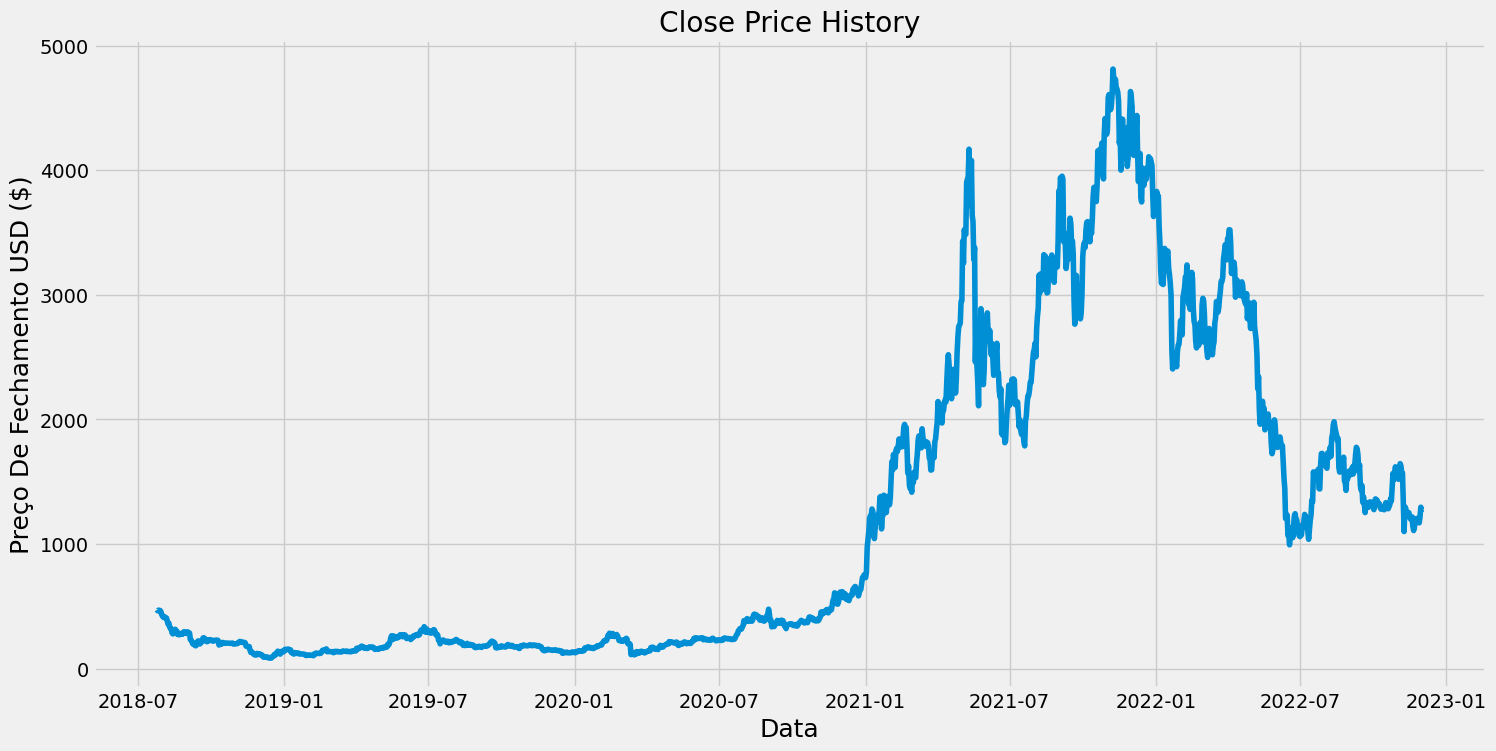

In [21]:
#extracting the closing price and setting the graph parameters 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Preço De Fechamento USD ($)', fontsize = 18)
plt.show()

In [23]:
#create a new dataframe for the closing price
data = df.filter(['Close'])
# convert the pandas dataframe to a numpy array
dataset = data.values
#get the nymber of rows to train the model 
training_data_len = math.ceil(len(dataset)* .8)
#show data lenght
training_data_len


1274

In [24]:
#scale the data(good practicing)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#show scaled data
scaled_data


array([[0.0821072 ],
       [0.08031862],
       [0.08150924],
       ...,
       [0.25622608],
       [0.25211957],
       [0.25322197]])

In [28]:
#create the training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]
#x independent training variables
#y target variables

for c in range (60, len(train_data)):
    x_train.append(train_data[c-60:c, 0])
    y_train.append(train_data[c, 0])
    if c <= 61:
        print(x_train)
        print(y_train)
        print()
    
    






[array([0.0821072 , 0.08031862, 0.08150924, 0.08092377, 0.08087449,
       0.07884732, 0.07393719, 0.0711621 , 0.06944333, 0.07063648,
       0.0683077 , 0.06899808, 0.06818205, 0.06258894, 0.05759675,
       0.05949511, 0.05285097, 0.05029924, 0.04976157, 0.04276568,
       0.04116599, 0.04189191, 0.04309374, 0.04894914, 0.04473638,
       0.04579861, 0.04018942, 0.04180307, 0.03956037, 0.04077934,
       0.04201946, 0.04131701, 0.04037598, 0.04257701, 0.04488169,
       0.04336153, 0.04226016, 0.04202728, 0.04463675, 0.04443158,
       0.04335031, 0.04260239, 0.03130914, 0.03086157, 0.02810933,
       0.02403723, 0.02382   , 0.02385279, 0.02131185, 0.02094487,
       0.02687218, 0.02695572, 0.02935114, 0.02882552, 0.02402115,
       0.0265805 , 0.02657922, 0.02967201, 0.03432388, 0.03303278])]
[0.033847119764884]

[array([0.0821072 , 0.08031862, 0.08150924, 0.08092377, 0.08087449,
       0.07884732, 0.07393719, 0.0711621 , 0.06944333, 0.07063648,
       0.0683077 , 0.06899808, 0.0681

In [33]:
# convert the x and y train datasets to numpy arrays
x_train = np.reshape(x_train, ())
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
#reshape the data, it needs to be tridimensional.
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1214, 60, 1)

In [37]:
#build the LSTM (The Long Short-Term Memory) model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [39]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [40]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)
#epochs are the number of interations when a DF moves back and forward a neural network

1214/1214 [==============================] - 26s 19ms/step - loss: 0.0027


In [41]:
#create the testing DataSet
test_data = scaled_data[training_data_len-60: , : ]
#create the datasets x_test and y_test
x_test =[]
y_test = dataset[training_data_len:, :]
for c in range(60,len(test_data)):
    x_test.append(test_data[c-60:c, 0])

In [42]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [44]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))


In [45]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


10/10 [==============================] - 1s 11ms/step


In [52]:
# get the root mean square error(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
# needs to be fixed, VERY high RMSE

243.18063298226076

C:\Users\pedro\AppData\Local\Temp\ipykernel_3632\4013908305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


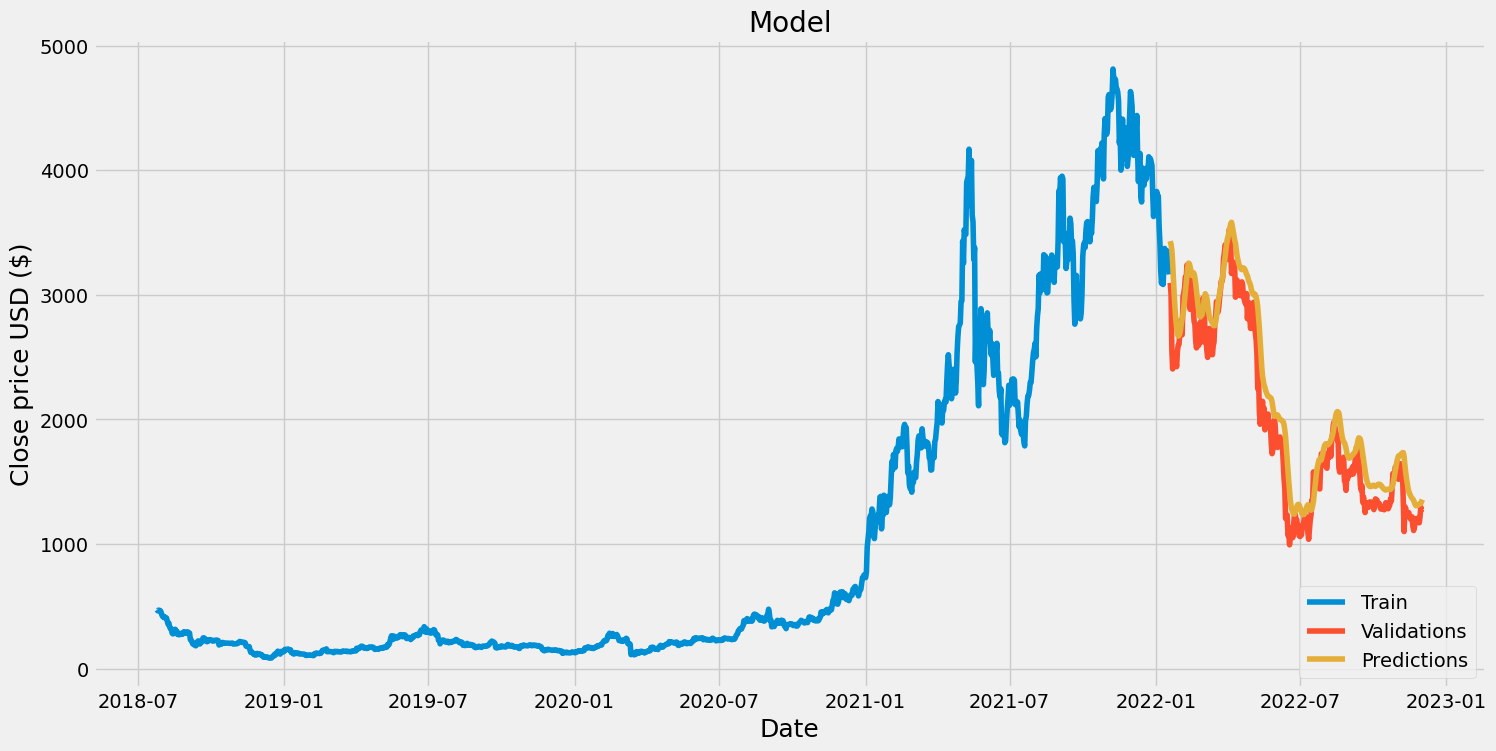

In [55]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Validations', 'Predictions'], loc='lower right')

In [56]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-01-19,3095.825928,3431.365967
2022-01-20,3001.120117,3403.815918
2022-01-21,2557.931641,3359.840332
2022-01-22,2405.181152,3256.969482
2022-01-23,2535.039062,3120.072021
...,...,...
2022-11-28,1170.086182,1321.098267
2022-11-29,1216.901245,1322.202393
2022-11-30,1295.688599,1326.350098


In [57]:
# get the quote
eth_quote =web.DataReader('ETH-USD', data_source='yahoo', start = '2018-07-25', end = dt.datetime.today())
#create a new df
new_df = eth_quote.filter(['Close'])
#get the last 60 days closing price values, then convert the df to an array
last_60_days = new_df[-60: ].values
#scale the data between 0 and 1
last_60_days_scaled =scaler.transform(last_60_days)
#create an empty list
X_test = []
#append teh past 60 days
X_test.append(last_60_days_scaled)
#convert the X_set to array
X_test = np.array(X_test)
#reshape
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1 ))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scale
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 24ms/step
[[1372.6201]]


In [61]:
# get the quote
eth_quote2 =web.DataReader('ETH-USD', data_source='yahoo', start = '2022-12-02', end = dt.datetime.today())

print(eth_quote2['Close'])

Date
2022-12-02    1282.499756
Name: Close, dtype: float64
